In [29]:
import time
import pandas as pd
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager



In [40]:
# Configure the webdriver
options = Options()
options.add_argument('--headless')
#chrome_path = ChromeDriverManager().install() 
#chrome_service = Service(chrome_path) 
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=options)
driver.implicitly_wait(5)

# Navigate to the webpage
url = 'https://ezdata.m5stack.com/share/?type=table&sid=86WVOhM6Qse0cOu1Sl9oMTgqCudJjVNx'
driver.get(url)

# Wait for the table to load and retrieve its content
time.sleep(10)

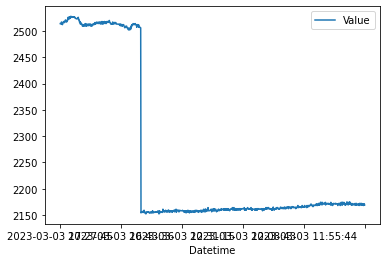

In [8]:
table = WebDriverWait(driver, 60).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "div[class='container'"))
)
table_html = table.get_attribute('innerHTML')

# Close the webdriver
driver.quit()

# Convert the HTML table to a Pandas DataFrame
dframes = pd.read_html(table_html, header=0)

df = dframes[0]

df.to_csv('output.csv', index=False)


df.plot(x='Datetime', y='Value', kind='line')
plt.show()

In [9]:
df

,Datetime,Value
0,2023-03-03 17:27:45,2514
1,2023-03-03 17:27:06,2514
2,2023-03-03 17:26:42,2514
3,2023-03-03 17:26:12,2513
4,2023-03-03 17:25:47,2517
...,...,...
995,2023-03-03 11:39:47,2168
996,2023-03-03 11:39:43,2171
997,2023-03-03 11:39:40,2169
998,2023-03-03 11:39:36,2171


# Extract function

In [30]:
links = {
    
    "humi_s1": "https://ezdata.m5stack.com/share/?type=table&sid=zXL3mxFblyp1TD8SgVgc8Q90oJc3hf2L",
    "humi_s2": "https://ezdata.m5stack.com/share/?type=table&sid=XwfzH0WqqgwQByxyek1HV7PY7zKXka59",
    "humi_s3": "https://ezdata.m5stack.com/share/?type=table&sid=7zWXgs8g2YYRXffQ3X2JRXjLqxMCadH8",
    "humi_s4": "https://ezdata.m5stack.com/share/?type=table&sid=AE9ICEBuQsGUj5QsHs2V9zTbLAnf9sfV",
    "press_s1": "https://ezdata.m5stack.com/share/?type=table&sid=V1h6alrl64M8d00GPEOEmVY8rC1n4bLH",
    "press_s2": "https://ezdata.m5stack.com/share/?type=table&sid=Vy3oUOdmaqS4rMyLqLVfam9g20H4Xjck",
    "press_s3": "https://ezdata.m5stack.com/share/?type=table&sid=2IbXmDNSRvZna4LZqLTOrT3o7K5BYh31",
    "press_s4": "https://ezdata.m5stack.com/share/?type=table&sid=17XVd1SN4zlrldTBROuBMV3R1ZVl1Zfy",
    "temp_s1": "https://ezdata.m5stack.com/share/?type=table&sid=Fx2vw3lSjMhMD3lvVfwxrs4DYjfIgAgs",
    "temp_s2": "https://ezdata.m5stack.com/share/?type=table&sid=86WVOhM6Qse0cOu1Sl9oMTgqCudJjVNx",
    "temp_s3": "https://ezdata.m5stack.com/share/?type=table&sid=PT0DoamEzvruT69FIN0vj4cIQfxNI8UJ",
    "temp_s4": "https://ezdata.m5stack.com/share/?type=table&sid=FtI1KRN9qcCwVoJYaXQva2q0nc69i0mT"
}

In [39]:
list(links.keys())

['humi_s1',
 'humi_s2',
 'humi_s3',
 'humi_s4',
 'press_s1',
 'press_s2',
 'press_s3',
 'press_s4',
 'temp_s1',
 'temp_s2',
 'temp_s3',
 'temp_s4']

In [37]:
def extract(url, sensor):
    # Configure the webdriver
    options = Options()
    options.add_argument('--headless')
    #chrome_path = ChromeDriverManager().install() 
    #chrome_service = Service(chrome_path) 
    driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=options)
    driver.implicitly_wait(5)

    # Navigate to the webpage
    #url = 'https://ezdata.m5stack.com/share/?type=table&sid=86WVOhM6Qse0cOu1Sl9oMTgqCudJjVNx'
    driver.get(url)

    # Wait for the table to load and retrieve its content
    time.sleep(10)
    table = WebDriverWait(driver, 60).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "div[class='container'"))
    )
    table_html = table.get_attribute('innerHTML')

    # Close the webdriver
    driver.quit()

    # Convert the HTML table to a Pandas DataFrame
    dframes = pd.read_html(table_html, header=0)

    df = dframes[0]

    df.to_csv("output_" + sensor + ".csv", index=False)
    return df

In [38]:
for sensor in list(links.keys()):
    df = extract(link[sensor], sensor)